In [313]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [314]:
df=pd.read_csv('/content/IMDbMoviesIndia.csv', encoding='latin-1')
df_movie= df.iloc[:,:1]
df_movie.head()

,Name
0,
1,#Gadhvi (He thought he was Gandhi)
2,#Homecoming
3,#Yaaram
4,...And Once Again


In [315]:
df_movie.shape


(15509, 1)

In [316]:
df_movie.describe()

,Name
count,15509
unique,13838
top,Anjaam
freq,7


In [317]:
df_movie.isna().sum()

Name    0
dtype: int64

In [318]:
df_ratings=df.iloc[:,1:7]

df_ratings.head()

,Year,Duration,Genre,Rating,Votes,Director
0,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa
1,(2019),109 min,Drama,7.0,8,Gaurav Bakshi
2,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar
3,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan
4,(2010),105 min,Drama,NaN,NaN,Amol Palekar


In [319]:
df_ratings.shape

(15509, 6)

In [320]:
df_ratings.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [321]:
df_ratings.isna().sum()

Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
dtype: int64

In [322]:
df_artest=df.iloc[:,7:]
df_artest.head()

,Actor 1,Actor 2,Actor 3
0,Manmauji,Birbal,Rajendra Bhatia
1,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,Sayani Gupta,Plabita Borthakur,Roy Angana
3,Prateik,Ishita Raj,Siddhant Kapoor
4,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [323]:
df_artest.shape

(15509, 3)

In [324]:
df_artest.describe()

,Actor 1,Actor 2,Actor 3
count,13892,13125,12365
unique,4718,4891,4820
top,Ashok Kumar,Rekha,Pran
freq,158,83,91


In [325]:
df_artest.isna().sum()

Actor 1    1617
Actor 2    2384
Actor 3    3144
dtype: int64

In [326]:
df1=pd.concat([df_movie,df_ratings,df_artest],axis=1)
df2=pd.concat([df1]).reset_index(names=['Movie_ID'])
df2.dropna()
df2.head()

,Movie_ID,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [327]:
df1.shape

(15509, 10)

In [328]:
df2=df1.drop(["Genre","Director","Actor 1","Actor 2","Actor 3"],axis=1)

df2.head()

,Name,Year,Duration,Rating,Votes
0,,NaN,NaN,NaN,NaN
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,7.0,8
2,#Homecoming,(2021),90 min,NaN,NaN
3,#Yaaram,(2019),110 min,4.4,35
4,...And Once Again,(2010),105 min,NaN,NaN


In [329]:
df2.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [330]:
df2.isna().sum()

Name           0
Year         528
Duration    8269
Rating      7590
Votes       7589
dtype: int64

In [331]:
df_final=df2.dropna()
df_final.dropna()
df_final['Year'] =  df_final['Year'].apply(lambda x: x.replace('(','').replace(')',''))
df_final['Duration'] =  df_final['Duration'].apply(lambda x: x.replace('','').replace('min',''))
df_final['Votes'] = df_final['Votes'].str.replace(',', '')
df_final.head()

<ipython-input-331-805cb57c68c8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Year'] =  df_final['Year'].apply(lambda x: x.replace('(','').replace(')',''))
<ipython-input-331-805cb57c68c8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Duration'] =  df_final['Duration'].apply(lambda x: x.replace('','').replace('min',''))
<ipython-input-331-805cb57c68c8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

,Name,Year,Duration,Rating,Votes
1,#Gadhvi (He thought he was Gandhi),2019,109,7.0,8
3,#Yaaram,2019,110,4.4,35
5,...Aur Pyaar Ho Gaya,1997,147,4.7,827
6,...Yahaan,2005,142,7.4,1086
8,?: A Question Mark,2012,82,5.6,326


In [332]:
df_final.shape

(5851, 5)

Text(0.5, 0, 'Rating')

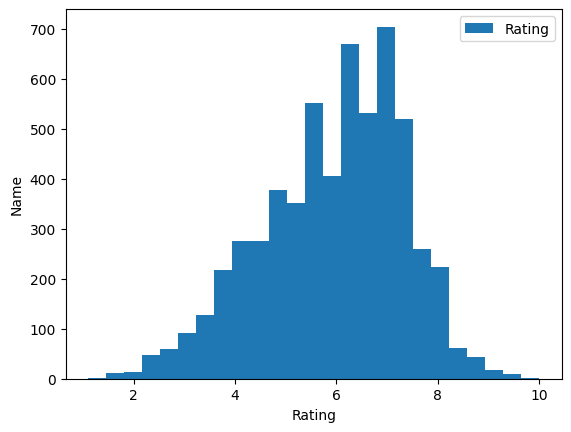

In [334]:
df_final.plot.hist(bins=25)
plt.ylabel("Name")
plt.xlabel("Rating")

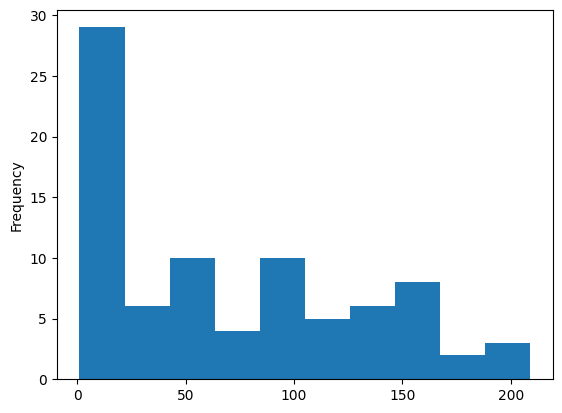

In [335]:

df_final['Rating'].value_counts().plot.hist(bins=10)
plt.show()

In [336]:
df_final.head()

,Name,Year,Duration,Rating,Votes
1,#Gadhvi (He thought he was Gandhi),2019,109,7.0,8
3,#Yaaram,2019,110,4.4,35
5,...Aur Pyaar Ho Gaya,1997,147,4.7,827
6,...Yahaan,2005,142,7.4,1086
8,?: A Question Mark,2012,82,5.6,326


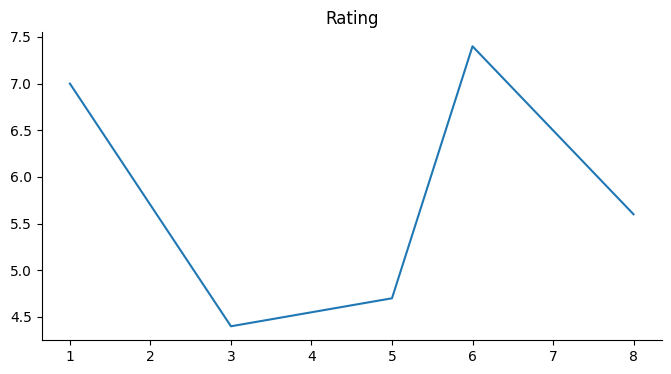

In [337]:
from matplotlib import pyplot as plt
_df_9['Rating'].plot(kind='line', figsize=(8, 4), title='Rating')
plt.gca().spines[['top', 'right']].set_visible(False)

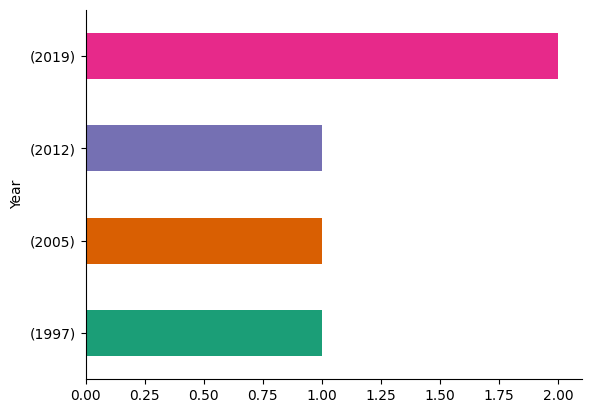

In [338]:

_df_2.groupby('Year').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [339]:
df_final.head()

,Name,Year,Duration,Rating,Votes
1,#Gadhvi (He thought he was Gandhi),2019,109,7.0,8
3,#Yaaram,2019,110,4.4,35
5,...Aur Pyaar Ho Gaya,1997,147,4.7,827
6,...Yahaan,2005,142,7.4,1086
8,?: A Question Mark,2012,82,5.6,326


In [340]:
input=df_final.drop(['Name','Rating'],axis=1)
target_final=df_final['Rating']

In [341]:
target_final.head()

1    7.0
3    4.4
5    4.7
6    7.4
8    5.6
Name: Rating, dtype: float64

In [342]:
input.head()

,Year,Duration,Votes
1,2019,109,8
3,2019,110,35
5,1997,147,827
6,2005,142,1086
8,2012,82,326


In [343]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(input)
scaled_df = pd.DataFrame(scaled_data,
                         columns=input.columns)
scaled_df.head()

,Year,Duration,Votes
0,0.977778,0.293333,0.000005
1,0.977778,0.296667,0.000051
2,0.733333,0.420000,0.001390
3,0.822222,0.403333,0.001828
4,0.900000,0.203333,0.000543


In [344]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(input,target_final,test_size=0.3)


In [345]:
print(Y_train)

15118    3.9
14248    7.6
1948     3.1
13666    7.4
4220     6.7
        ... 
9845     4.8
8758     6.6
15092    7.6
11400    7.5
12630    5.5
Name: Rating, Length: 4095, dtype: float64


In [346]:
print(Y_test)

12661    7.5
32       5.6
8212     5.4
11628    7.6
10543    6.0
        ... 
6830     5.9
6211     7.3
5844     7.5
12896    4.3
10656    5.5
Name: Rating, Length: 1756, dtype: float64


In [347]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)



LinearRegression()

In [348]:
X_test = np.array(X_test)

In [349]:
model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5.63535192, 5.67499192, 5.70854856, ..., 6.27725764, 6.14419474,
       6.29607816])

In [350]:
print(Y_test)

12661    7.5
32       5.6
8212     5.4
11628    7.6
10543    6.0
        ... 
6830     5.9
6211     7.3
5844     7.5
12896    4.3
10656    5.5
Name: Rating, Length: 1756, dtype: float64
